<a href="https://colab.research.google.com/github/BarbosaXBarbosa/Bootcamp_Dio_Data_Science/blob/main/Aula4%265_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4


## Trabalhando com Planilhas do Excel

In [ ]:
# Importando a biblioteca
import pandas as pd

In [ ]:
# Leitura dos Arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PandasAulaDio/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PandasAulaDio/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PandasAulaDio/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PandasAulaDio/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PandasAulaDio/datasets/Salvador.xlsx")

In [ ]:
# dfX.head() // Rode esse código e observe que todos df possuem a mesma estrutura.

In [ ]:
# Aqui concatenamos os DataFrames, ou seja, juntamos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Aqui pegamos 5 amostras do df
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
27,Natal,2018-07-16,390.00,853,3
15,Salvador,2019-01-01,20.15,1036,3
126,Salvador,2019-03-02,41.69,1036,2
28,Fortaleza,2019-01-01,34.88,1004,3
139,Fortaleza,2019-03-02,141.16,980,7


In [ ]:
# Verificando o tipo de dado das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

- Perceba que a coluna lojaId recebeu o tipo inteiro, porém este atributo trata-se de um código utilizado pelas lojas para diferenciá-las. O tipo inteiro é utilizado para calculos, então vamos alterar o tipo de dado desta coluna.

In [ ]:
# Alterando o o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


------------------------------------------------------------------------------------------------------

### Tratando valores faltantes

In [ ]:
#Consultando linhas com valores faltantes
df.isnull() # // Retorna os falso ou verdadeiro para cada valor de todo o dataframe.

,Cidade,Data,Vendas,LojaID,Qtde
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
235,False,False,False,False,False
236,False,False,False,False,False
237,False,False,False,False,False
238,False,False,False,False,False


In [ ]:
df.isnull().sum() # // Vai somar os valores faltantes e retornar por coluna, devidamente agrupado.

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos pelas médias
# df["Vendas"].fillna(df["Vendas"].mean(), inplace = True) # // O método fillna preenche os valores nulos da coluna, passamos o parâmetro inplace para que seja substituido na base do df
# df["Vendas"].mean()

- Substituimos os valores pela média, para que as alteraçõs não interfiram tanto na nossa análise.

In [ ]:
# df.isnull().sum()

- Ou podemos substituir por zero, se você achar que a média pode interferir demais na análise.



In [ ]:
# df["Vendas"].fillna(0, inplace = True)

- Podemos também utilizar uma terceira abordagem, simplesmente a pagar a linha em que os valores nulos aparecem.

In [ ]:
# Apagando as linhas com valores nulos.
df.dropna(inplace = True) # // Observe que aqui não escolhemos a coluna, então se tiverem mais valores nulos em outras colunas eles também serão apagados.
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace = True)

In [ ]:
#Removendo APENAS linhas que possuem valores nulos em todas as colunas
df.dropna(how='all', inplace=True) # //Observe que se você rodar esse código o valor de linhas continua o mesmo, pois os valores nulos apenas na coluna da venda não satisfaz a condição.

In [ ]:
# Retorna o número de linhas do Df, que se você utilizou a terceira abordagem pode diminuir.
df.shape[0]

894



> Perceba que como estamos fazendo as alterações 'inplace', para testar as abordagens você vai ter que rodar os códigos de importação e concatenação. Porque o inplace muda a estrutura da variável df (DataFrame).


--------------------------------------------------------------------------------------------------------------------------------------------------------------

### Criando colunas novas

In [ ]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"]) # //A receita nada mais que a multiplicação(mul()) da venda pela quantidade de produto vendido

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Retornando a maior receita
df["Receita"].max()

3544.0

> Retornando as linhas com as 10 maiores receitas


In [ ]:
df["Receita"].sort_values( ascending=False) # // Aqui organizamos por valores a coluna da receita, de forma decrescente(ascending = False).

7      3544.00
55     3436.00
51     3436.00
30     3424.00
41     3340.00
        ...   
95        5.13
92        4.57
92        4.57
65        4.01
118       3.34
Name: Receita, Length: 894, dtype: float64

In [ ]:
df["Receita"].sort_values( ascending=False).head(10) # Passando o head podemos pegar os 10 primeiros maiores valores

7     3544.0
55    3436.0
51    3436.0
30    3424.0
41    3340.0
38    3312.0
10    3312.0
69    3268.0
62    3172.0
52    3112.0
Name: Receita, dtype: float64

In [ ]:
# Vamos guardar em uma variável para que possamos passar como filtro. Retornando assim as linhas completas com as 10 maiores receitas
receitasMax10 = df["Receita"].sort_values( ascending=False).head(10)

In [ ]:
receitasMax10.values

array([3544., 3436., 3436., 3424., 3340., 3312., 3312., 3268., 3172.,
       3112.])

In [ ]:
# Retornando as linhas com as 10 maiores receitas
# df[(df["Receita"] == receitasMax10.values)]

Aqui eu tentei de maneira falha utilizar um método para filtrar, porém mais à frente na aula eu descubro os seguintes métodos.

In [ ]:
#nlargest ======> Retorna as maiores receitas com parâmetro escolhendo quantas vão ser retornadas.
df.nlargest(10, "Receita") # //E ae está as 10 maiores receitas e seus respectivos dados no DF

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
10,Natal,2018-10-27,828.0,852,4,3312.0
38,Natal,2018-02-25,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


Aqui já podemos notar uma tendência de Natal ter as lojas e vendas mais caras, comparado as outras cidades.

In [ ]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupando a receita por cidades
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Aula 5

## Trabalhando com Datas

In [ ]:
# Transformando a coluna de data em tipo inteiro   # // Vamos transformar para que simule uma situação em que os tipos das colunas venham errados.]
df["Data"] = df["Data"].astype("Int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# Verificando...
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
# Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

Observe que a receita está aumentando com o passar dos anos.

In [ ]:
# Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year # // dt.year extraí a informação do ano da coluna de datas.

In [ ]:
df.sample(5) # // Aqui vemos o resultado, pegando 5 linhas de amostragem.

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
46,Natal,2019-03-26,753.00,853,2,1506.00,2019
218,Natal,2019-01-02,189.12,1036,3,567.36,2019
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,2018
122,Recife,2019-03-02,235.06,983,3,705.18,2019
33,Aracaju,2018-01-01,35.09,1523,4,140.36,2018


Se você precisar extrair o dia e avenda você pode usar "dt.day e dt.month" respectivamente.

In [ ]:
# Retornando a data mais antiga
df["Data"].min()  # // Observe que o '.min' também funciona com o tipo date.

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias
df["difernca_dias"] = df["Data"] - df["Data"].min() # // Aqui fazemos a substração do data mínima, para representar o dia 0.

- Observe que como a  biblioteca do pandas é bem dinâmica se você simplesmente subtrair uma data de outra ela retorna em dias já.

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,difernca_dias
36,Fortaleza,2019-01-01,36.31,1004,2,72.62,2019,365 days
93,Natal,2019-01-02,15.58,1037,1,15.58,2019,366 days
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,403 days
50,Recife,2019-01-01,7.24,983,4,28.96,2019,365 days
136,Recife,2019-03-02,39.09,982,4,156.36,2019,425 days


------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Aula 6

In [ ]:
# Mostrando o número de vendas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

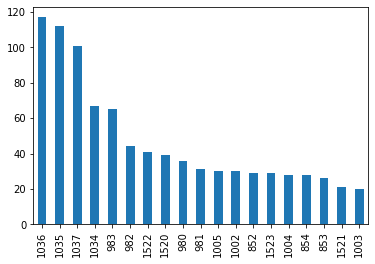

In [ ]:
# Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

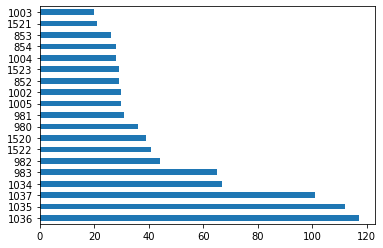

In [ ]:
# Barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

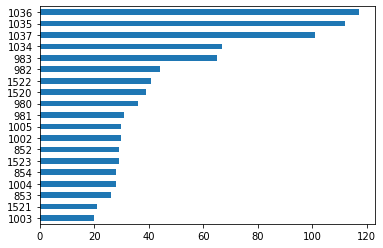

In [ ]:
df["LojaID"].value_counts(ascending=True).plot.barh(); # //Observe que o ponto e vírgula no final esconde a linha matplotlib.

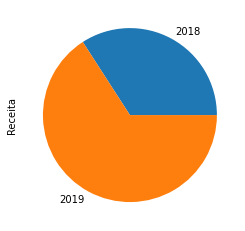

In [ ]:
# Gráfico de pizza // Mostrando a receita das vendas por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
# Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

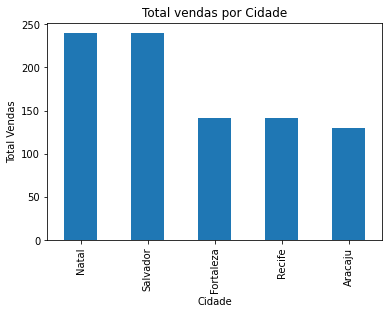

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

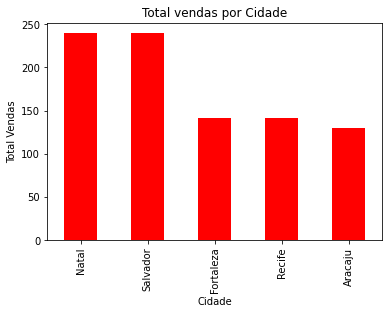

In [ ]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterando o estilo
plt.style.use("ggplot")
# Criando um tabela com os meses das vendas para plotar o gráfico
df["mes_venda"] = df["Data"].dt.month
df.sample(5) 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,difernca_dias,mes_venda
116,Recife,2019-03-02,79.10,982,2,158.20,2019,425 days,3
100,Salvador,2019-01-01,190.97,1036,2,381.94,2019,365 days,1
200,Salvador,2019-01-02,41.06,1035,1,41.06,2019,366 days,1
107,Recife,2019-01-01,15.40,980,7,107.80,2019,365 days,1
90,Aracaju,2018-01-01,16.27,1522,1,16.27,2018,0 days,1


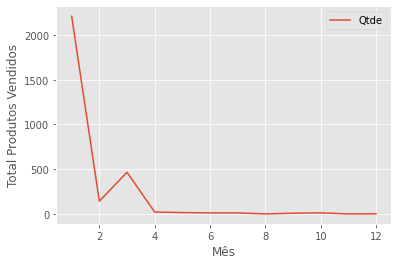

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

Observe que podemos já passar a expressão como parâmetro ao invés de criá-la.

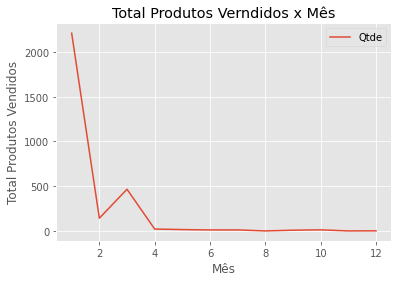

In [ ]:
df.groupby(df["Data"].dt.month)["Qtde"].sum().plot(title = "Total Produtos Verndidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [ ]:
df.groupby(df["Data"].dt.month)["Qtde"].sum()

Data
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas vendas de 2019
df_2019 = df[df["Data"].dt.year == 2019]

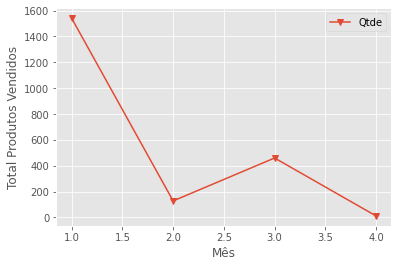

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v") # Observe o marcardor "v"
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

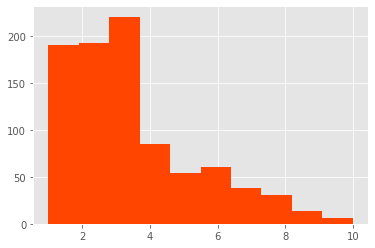

In [ ]:
# Histograma
plt.hist(df["Qtde"],color="orangered");

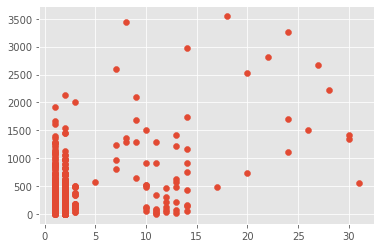

In [ ]:
plt.scatter(x = df_2019["Data"].dt.day, y = df_2019["Receita"]); # Plotando um gráfico de dispersão

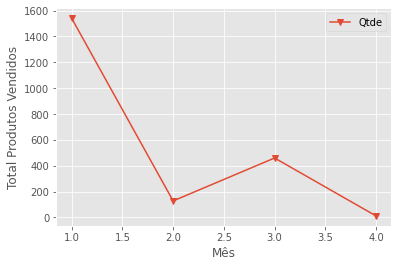

In [ ]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v") # Observe o marcardor "v"
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")